## Coronavirus Cases and Deaths in NYC
```
Daily data from New York Times GitHub
https://github.com/nytimes/covid-19-data/

raw file:
https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
```

In [1]:
import sys,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # make charts in high resolution

In [2]:
fname = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
aa = pd.read_csv(fname)
print(f"aa: len={len(aa)}, cols={list(aa.columns)}")
mask = (aa.state=="New York") & (aa.county == "New York City")
bb = aa[mask]
bb.index = range(len(bb))
bb = bb[['date', 'cases', 'deaths']].copy()
print(f"bb: len={len(bb)}, cols={list(bb.columns)}")
print(bb.head(3))
print("...")
print(bb.tail(3))

aa: len=2502832, cols=['date', 'county', 'state', 'fips', 'cases', 'deaths']
bb: len=804, cols=['date', 'cases', 'deaths']
         date  cases  deaths
0  2020-03-01      1     0.0
1  2020-03-02      1     0.0
2  2020-03-03      2     0.0
...
           date    cases   deaths
801  2022-05-11  2411431  40256.0
802  2022-05-12  2417909  40261.0
803  2022-05-13  2422658  40267.0


In [3]:
# form string for date range
date_first = list(bb['date'])[0]
date_last  = list(bb['date'])[-1]
str_dates = f"for dates: {date_first} - {date_last}"
print(str_dates)

for dates: 2020-03-01 - 2022-05-13


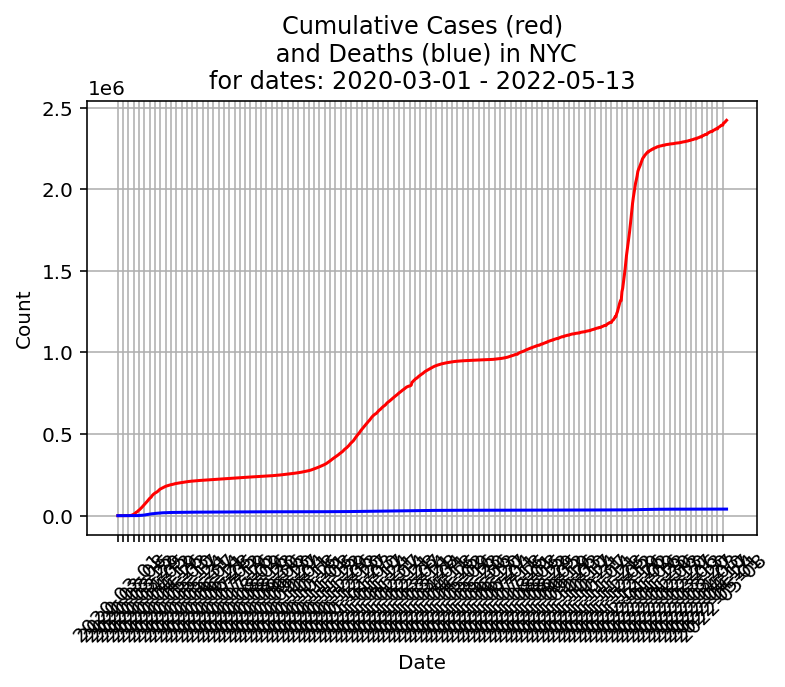

In [4]:
# plot cumulative cases and deaths against dates
x = bb.date
y = bb.cases
z = bb.deaths

fig, ax = plt.subplots()
_=ax.plot(x, y, 'r-',label='aa')
_=ax.plot(x, z, 'b-')
_=ax.set_xticks(ax.get_xticks()[::7]) # every 7th date
_=ax.xaxis.set_tick_params(rotation=45)
_=ax.set_title(f'Cumulative Cases (red)\n and Deaths (blue) in NYC\n{str_dates}')
_=ax.set_xlabel('Date')
_=ax.set_ylabel('Count')
_=ax.grid()
plt.show();

In [6]:
# add columns for daily increments
cc = bb.copy()
N = len(cc)
cases_total = cc.cases.values
cases_daily = np.zeros(N,np.int64)
death_total = cc.deaths.values
death_daily = np.zeros(N,np.int64)
for ii in range(1,N):
    cases_daily[ii] = cases_total[ii]-cases_total[ii-1]
    death_daily[ii] = death_total[ii]-death_total[ii-1]
cc = cc.copy()
cc["cases_daily"] = cases_daily
cc["death_daily"] = death_daily
cc.tail()

,date,cases,deaths,cases_daily,death_daily
799,2022-05-09,2406070,40240.0,13167,8
800,2022-05-10,2408357,40248.0,2287,8
801,2022-05-11,2411431,40256.0,3074,8
802,2022-05-12,2417909,40261.0,6478,5
803,2022-05-13,2422658,40267.0,4749,6


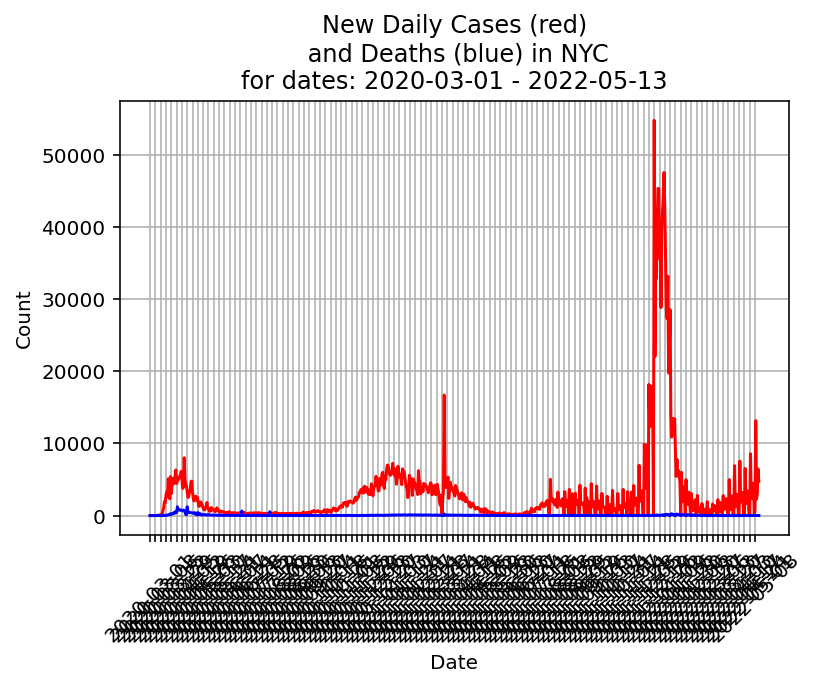

In [7]:
# plot daily increments
x = cc.date
y = cc.cases_daily
z = cc.death_daily

fig, ax = plt.subplots()
_=ax.plot(x, y, 'r-')
_=ax.plot(x, z, 'b-')
_=ax.set_xticks(ax.get_xticks()[::7]) # every 7th date
_=ax.xaxis.set_tick_params(rotation=45)
_=ax.set_title(f'New Daily Cases (red)\n and Deaths (blue) in NYC\n{str_dates}')
_=ax.set_xlabel('Date')
_=ax.set_ylabel('Count')
_=ax.grid()
plt.show();